In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Load MNIST data

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


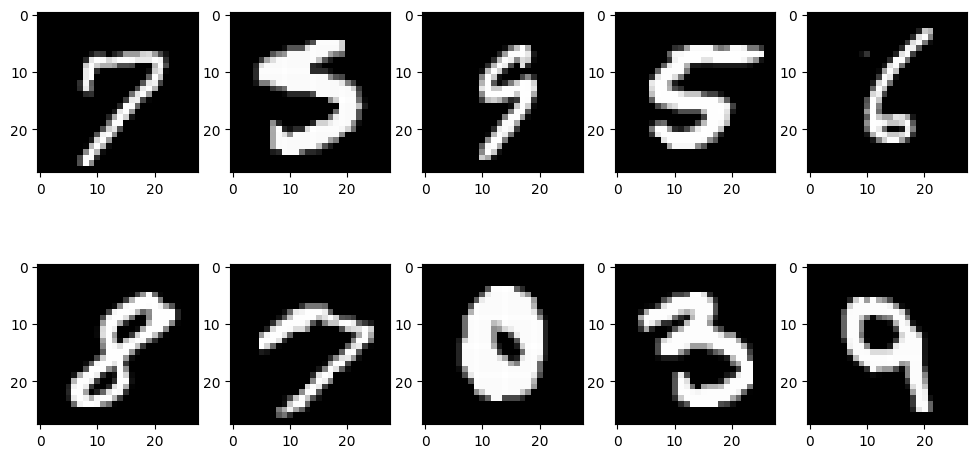

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_images = 10
random_indices = np.random.randint(0, len(x_train), num_images)

plt.figure(figsize=(12,6))
for i, idx in enumerate(random_indices):
    plt.subplot(2,5, i+1)
    plt.imshow(x_train[idx], cmap='gray')

plt.show()

# Reshape and normalize input data

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')/255



In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# One hot encode the target labels

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_test.shape)
print(y_train.shape)

(10000, 10)
(60000, 10)


# split training data into train and validation sets

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.1,
    shear_range=0.2
)

datagen.fit(x_train)

# augmented_data = next(datagen.flow(x_train, batch_size=len(x_train), shuffle=False))

# CNN Model

In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1), padding='same'),
    MaxPooling2D(pool_size=(3,3), strides=(1,1)),
    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3,3), strides=(1,1),),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,718,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,738,826 (18.08 MB)

 Trainable params: 4,738,826 (18.08 MB)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [ ]:
model1 = model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2 = model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with original dataset

In [ ]:
history_original = model1.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.8936 - loss: 0.3393 - val_accuracy: 0.9833 - val_loss: 0.0535
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9863 - loss: 0.0415 - val_accuracy: 0.9874 - val_loss: 0.0437
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9915 - loss: 0.0269 - val_accuracy: 0.9853 - val_loss: 0.0519
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9947 - loss: 0.0172 - val_accuracy: 0.9888 - val_loss: 0.0412
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9957 - loss: 0.0135 - val_accuracy: 0.9875 - val_loss: 0.0477
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9958 - loss: 0.0122 - val_accuracy: 0.9907 - val_loss: 0.0368
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9972 - loss: 0.0091 - val_accuracy: 0.9881 - val_loss: 0.0438
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9966 - loss: 0.0091 - val_accu

# Train model with augmented data set

In [ ]:
history_augmented = model2.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=10, validation_data=(x_val, y_val))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


375/375 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - accuracy: 0.8522 - loss: 0.5120 - val_accuracy: 0.9797 - val_loss: 0.0645
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 51ms/step - accuracy: 0.9623 - loss: 0.1179 - val_accuracy: 0.9816 - val_loss: 0.0587
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.9712 - loss: 0.0966 - val_accuracy: 0.9819 - val_loss: 0.0623
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.9751 - loss: 0.0838 - val_accuracy: 0.9833 - val_loss: 0.0536
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.9774 - loss: 0.0740 - val_accuracy: 0.9875 - val_loss: 0.0396
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.9771 - loss: 0.0735 - val_accuracy: 0.9819 - val_loss: 0.0588
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.9780 - loss: 0.0742 - val_accuracy: 0.9848 - val_loss: 0.0523
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.9793 - loss: 0.0670 - val_accurac

# Plot accuracy

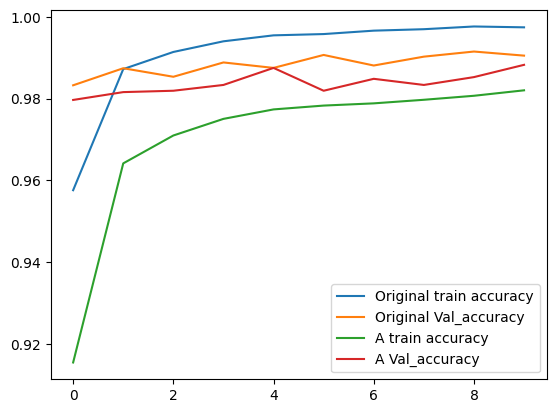

In [ ]:
plt.plot(history_original.history['accuracy'], label='Original train accuracy')
plt.plot(history_original.history['val_accuracy'], label='Original Val_accuracy')
plt.plot(history_augmented.history['accuracy'], label='A train accuracy')
plt.plot(history_augmented.history['val_accuracy'], label='A Val_accuracy')
plt.legend()

In [ ]:
# from tensorflow.keras.utils import plot_model

# plot_model(model, show_shapes=True, show_layer_names=True)

# Evaluate

In [ ]:
score_original = model1.evaluate(x_test, y_test, verbose=0)
score_augmented = model2.evaluate(x_test, y_test, verbose=0)

print('Original Test loss:', score_original[0])
print('Original Test accuracy:', score_original[1])
print('Augmented Test loss:', score_augmented[0])
print('Augmented Test Accuracy:', score_augmented[1])


Original Test loss: 0.0427258163690567
Original Test accuracy: 0.9882000088691711
Augmented Test loss: 0.0427258163690567
Augmented Test Accuracy: 0.9882000088691711


# Predict

In [ ]:
predict_y = model.predict(x_test)

for i in range(10):
  print(np.argmax(y_test[i]),"---------", np.argmax(predict_y[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
7 --------- 7
2 --------- 2
1 --------- 1
0 --------- 0
4 --------- 4
1 --------- 1
4 --------- 4
9 --------- 9
5 --------- 6
9 --------- 9
